In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
def get_result(query):
    # Membuka koneksi ke database SQLite yang disebut 'olist.db'
    conn = sqlite3.connect('olist.db')
    # Membuat objek kursor untuk berinteraksi dengan database
    cursor = conn.cursor()  # Tambahkan tanda kurung () di sini
    # Mengeksekusi query SQL yang diberikan
    cursor.execute(query)
    # Mengambil hasil dari query dalam bentuk daftar (list) data
    data = cursor.fetchall()
    # Menutup koneksi ke database setelah selesai
    conn.close()
    # Mengembalikan hasil data dari query
    return data
def create_df(data, columns):
    # Membuat DataFrame dari data yang diberikan dengan kolom yang ditentukan
    df = pd.DataFrame(data=data, columns=columns)
    # Menghapus kolom 'index' dari DataFrame (jika ada)
    df = df.drop(['index'], axis=1)
    # Mengembalikan DataFrame yang telah dibuat
    return df

In [3]:
query233 = """
    SELECT
        c.customer_unique_id, -- Memilih kolom customer_unique_id
        MAX(o.order_purchase_timestamp) AS R, -- Menghitung tanggal pembelian terbaru sebagai R
        COUNT(DISTINCT o.order_id) AS F, -- Menghitung jumlah pesanan yang unik sebagai F
        SUM(p.payment_value) AS M -- Menghitung total pembayaran sebagai M
    FROM olist_order_customer_dataset c
    LEFT JOIN olist_order_dataset o ON c.customer_id = o.customer_id -- Melakukan JOIN dengan tabel olist_order_dataset berdasarkan customer_id
    LEFT JOIN olist_order_payments_dataset p ON o.order_id = p.order_id -- Melakukan JOIN dengan tabel olist_order_payments_dataset berdasarkan order_id
    WHERE o.order_status NOT IN ('unavailable', 'canceled') -- Menggunakan kondisi WHERE untuk menyaring order dengan status tertentu
    GROUP BY c.customer_unique_id -- Mengelompokkan hasil berdasarkan customer_unique_id
"""

In [4]:
data3 = get_result(query233)

In [5]:
RFM = pd.DataFrame(data3, columns=['customer_unique_id', 'R', 'F', 'M'])
RFM

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,2067.42
94986,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,84.58
94987,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,112.46
94988,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,133.69


In [6]:
RFM.isna().sum()

customer_unique_id    0
R                     0
F                     0
M                     1
dtype: int64

In [7]:
RFM = RFM[RFM['M'].notnull()]
RFM.isna().sum()

customer_unique_id    0
R                     0
F                     0
M                     0
dtype: int64

In [8]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94989 entries, 0 to 94989
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94989 non-null  object 
 1   R                   94989 non-null  object 
 2   F                   94989 non-null  int64  
 3   M                   94989 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ MB


In [9]:
#mengubah tipe data kolom R dari Object menjadi DateTime
RFM['R'] = pd.to_datetime(RFM['R']) 
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94989 entries, 0 to 94989
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  94989 non-null  object        
 1   R                   94989 non-null  datetime64[ns]
 2   F                   94989 non-null  int64         
 3   M                   94989 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.6+ MB


<ipython-input-9-be1678a604b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R'] = pd.to_datetime(RFM['R'])


In [10]:
RFM['R'] = (pd.to_datetime(RFM['R'].max()) - RFM['R'] + pd.to_timedelta(1, 'D'))

<ipython-input-10-db28e1edcb2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R'] = (pd.to_datetime(RFM['R'].max()) - RFM['R'] + pd.to_timedelta(1, 'D'))


In [11]:
RFM

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116 days 22:10:30,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119 days 21:55:30,1,27.19
2,0000f46a3911fa3c0805444483337064,542 days 12:01:54,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326 days 12:37:16,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293 days 13:21:15,1,196.89
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,452 days 12:06:21,1,2067.42
94986,fffea47cd6d3cc0a88bd621562a9d061,267 days 12:59:01,1,84.58
94987,ffff371b4d645b6ecea244b27531430a,573 days 17:17:41,1,112.46
94988,ffff5962728ec6157033ef9805bacc48,124 days 17:49:16,1,133.69


In [12]:
RFM['R'] = RFM['R'].dt.days


<ipython-input-12-bd4be8b88b81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R'] = RFM['R'].dt.days


In [13]:
RFM

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42
94986,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
94987,ffff371b4d645b6ecea244b27531430a,573,1,112.46
94988,ffff5962728ec6157033ef9805bacc48,124,1,133.69


In [14]:
# Recency: the later, the better
# Menghitung skor (score) untuk R (Recency), dengan pembagian menjadi 5 kelompok menggunakan qcut
# Kelompok yang lebih rendah akan mendapatkan skor yang lebih baik
RFM['R_score'] = pd.qcut(RFM['R'], 5, labels=[5, 4, 3, 2, 1])\
                      .astype(str)

# R column berisi perbedaan dari periode terakhir. Semakin rendah nilainya, semakin baik skornya
# Menggunakan qcut, kita dapat membagi catatan menjadi kelompok yang memiliki jumlah hampir sama (5 kelompok)

RFM['F_score'] = RFM['F'].apply(lambda x: '1' if x == 1 else '2')
# Menghitung skor (score) untuk F (Frequency)
# Jika nilai F adalah 1, maka berikan skor '1', jika tidak, berikan skor '2'
# Ini mengelompokkan pelanggan ke dalam 2 kelompok, yaitu yang hanya memiliki satu pembelian dan yang lainnya

# Menghitung skor (score) untuk M (Monetary), dengan pembagian menjadi 5 kelompok menggunakan qcut
# Kelompok yang lebih rendah akan mendapatkan skor yang lebih baik
RFM['M_score'] = pd.qcut(RFM['M'], 5, labels=[1, 2, 3, 4, 5])\
                      .astype(str)
# Menggunakan qcut, kita dapat membagi catatan menjadi kelompok yang memiliki jumlah hampir sama (5 kelompok)

<ipython-input-14-a3a0d08ad689>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R_score'] = pd.qcut(RFM['R'], 5, labels=[5, 4, 3, 2, 1])\
<ipython-input-14-a3a0d08ad689>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['F_score'] = RFM['F'].apply(lambda x: '1' if x == 1 else '2')
<ipython-input-14-a3a0d08ad689>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [15]:
print(
        RFM['R_score'].value_counts(normalize=True)\
                           .sort_index(), '\n\n',
        RFM['F_score'].value_counts(normalize=True)\
                           .sort_index(),'\n\n',
        RFM['M_score'].value_counts(normalize=True)\
                           .sort_index()
       )

R_score
1    0.199802
2    0.199370
3    0.200171
4    0.199360
5    0.201297
Name: proportion, dtype: float64 

 F_score
1    0.969596
2    0.030404
Name: proportion, dtype: float64 

 M_score
1    0.200034
2    0.200002
3    0.199960
4    0.200023
5    0.199981
Name: proportion, dtype: float64


In [16]:
RFM

,customer_unique_id,R,F,M,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,4
...,...,...,...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42,1,1,5
94986,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,3,1,2
94987,ffff371b4d645b6ecea244b27531430a,573,1,112.46,1,1,3
94988,ffff5962728ec6157033ef9805bacc48,124,1,133.69,4,1,4


In [17]:
RFM['RFM_Score'] = RFM['R_score'].astype(str) + RFM['F_score'].astype(str) + RFM['M_score'].astype(str)


<ipython-input-17-b4bec56dc156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['RFM_Score'] = RFM['R_score'].astype(str) + RFM['F_score'].astype(str) + RFM['M_score'].astype(str)


In [18]:
RFM

,customer_unique_id,R,F,M,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42,1,1,5,115
94986,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,3,1,2,312
94987,ffff371b4d645b6ecea244b27531430a,573,1,112.46,1,1,3,113
94988,ffff5962728ec6157033ef9805bacc48,124,1,133.69,4,1,4,414


In [19]:
def classify_rfm_score(rfm_score):
    if rfm_score in ('555', '554', '544', '545', '454', '455', '445'):
        return 'Champion'
    elif rfm_score in ('543', '444', '435', '355', '354', '345', '344', '335'):
        return 'Loyal'
    elif rfm_score in ('553', '551', '552', '541', '542', '533', '532', '531',
                     '452', '451', '442', '441', '431', '453', '433', '432',
                     '423', '353', '352', '351', '342', '341', '333', '323'):
        return 'Potential Loyalist'
    elif rfm_score in ('512', '511', '422', '421', '412', '411', '311'):
        return 'New Customer'
    elif rfm_score in ('525', '524', '523', '522', '521', '515', '514', '513',
                     '425', '424', '413', '414', '415', '315', '314', '313'):
        return 'Promising'
    elif rfm_score in ('535', '534', '443', '434', '343', '334', '325', '324'):
        return 'Needs Attention'
    elif rfm_score in ('331', '321', '312', '221', '213', '231', '241', '251'):
        return 'About To Sleep'
    elif rfm_score in ('255', '254', '245', '244', '253', '252', '243', '242',
                     '235', '234', '225', '224', '153', '152', '145', '143',
                     '142', '135', '134', '133', '125', '124'):
        return 'At Risk'
    elif rfm_score in ('155', '154', '144', '214', '215', '115', '114', '113'):
        return 'Cannot Lose Them'
    elif rfm_score in ('332', '322', '233', '232', '223', '222', '132', '123',
                     '122', '212', '211'):
        return 'Hibernating Customer'
    elif rfm_score in ('111', '112', '121', '131', '141', '151'):
        return 'Lost Customer'
    return 'Undefined'  # Jika tidak ada kecocokan pada RFM_Score

# Gunakan fungsi untuk mengklasifikasikan RFM_Score
RFM['RFM_Class'] = RFM['RFM_Score'].apply(classify_rfm_score)

<ipython-input-19-413a798cce62>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['RFM_Class'] = RFM['RFM_Score'].apply(classify_rfm_score)


In [20]:
RFM

,customer_unique_id,R,F,M,R_score,F_score,M_score,RFM_Score,RFM_Class
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,4,414,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,New Customer
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112,Lost Customer
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211,Hibernating Customer
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,4,214,Cannot Lose Them
...,...,...,...,...,...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42,1,1,5,115,Cannot Lose Them
94986,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,3,1,2,312,About To Sleep
94987,ffff371b4d645b6ecea244b27531430a,573,1,112.46,1,1,3,113,Cannot Lose Them
94988,ffff5962728ec6157033ef9805bacc48,124,1,133.69,4,1,4,414,Promising


In [21]:
RFM['RFM_Class'].value_counts()

RFM_Class
Promising               34119
New Customer            18591
Cannot Lose Them        17651
Lost Customer            7944
Hibernating Customer     7915
About To Sleep           7329
At Risk                   776
Needs Attention           507
Potential Loyalist        157
Name: count, dtype: int64

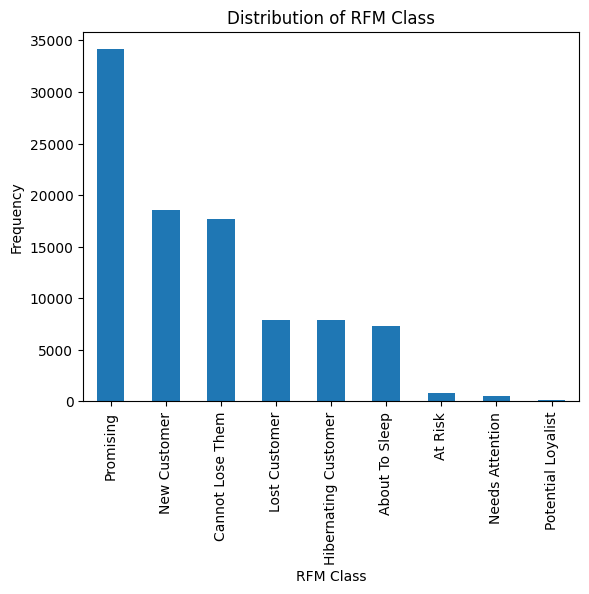

In [22]:
import matplotlib.pyplot as plt

rfm_class = RFM['RFM_Class'].value_counts()

# membuat barchart
rfm_class.plot.bar()

# menambahkan label sumbu x dan y
plt.xlabel('RFM Class')
plt.ylabel('Frequency')

# menambahkan judul
plt.title('Distribution of RFM Class')

# menampilkan barchart
plt.show()

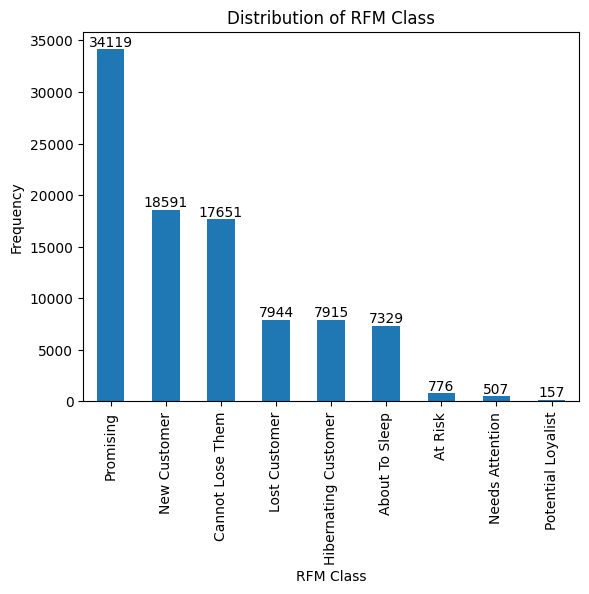

In [23]:
# asumsi RFM adalah sebuah DataFrame yang sudah ada
rfm_class = RFM['RFM_Class'].value_counts()

# membuat barchart
ax = rfm_class.plot.bar()

# menambahkan label sumbu x dan y
plt.xlabel('RFM Class')
plt.ylabel('Frequency')

# menambahkan judul
plt.title('Distribution of RFM Class')


# menambahkan label di atas barchart
for p in ax.patches:
    # mendapatkan nilai x dan y dari setiap bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    # menampilkan nilai y di atas bar dengan jarak 0.1
    ax.annotate(str(y), (x, y + 0.1), ha='center', va='bottom')

# menampilkan barchart
plt.show()

## Produk apa yang seharusnya dijual untuk meningkatkan jumlah transaksi untuk bulan 10 tahun 2018

In [24]:
purchses = """
    SELECT
        strftime('%Y', order_purchase_timestamp) AS year, -- Mengambil tahun dari tanggal order_purchase_timestamp
        strftime('%m', order_purchase_timestamp) AS month, -- Mengambil bulan dari tanggal order_purchase_timestamp
        COUNT(o.order_id) AS count -- Menghitung jumlah pesanan (order_id) sebagai 'count'
    FROM olist_order_dataset AS o -- Menggunakan tabel 'olist_order_dataset' dengan alias 'o'
    WHERE o.order_status NOT IN ('unavailable', 'canceled') -- Menggunakan kondisi WHERE untuk menyaring order dengan status tertentu
    GROUP BY year, month -- Mengelompokkan hasil berdasarkan tahun dan bulan
    ORDER BY year, month ASC -- Mengurutkan hasil berdasarkan tahun dan bulan secara menaik (ascending)
"""
purs = get_result(purchses)

In [25]:
purchs = pd.DataFrame(purs, columns=['year', 'month', 'count'])
purchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    24 non-null     object
 1   month   24 non-null     object
 2   count   24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [26]:
#mengubah type data dari object ke int64
purchs['year'] = purchs['year'].astype('int64')
purchs['month'] = purchs['month'].astype('int64')

In [27]:
purchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    24 non-null     int64
 1   month   24 non-null     int64
 2   count   24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


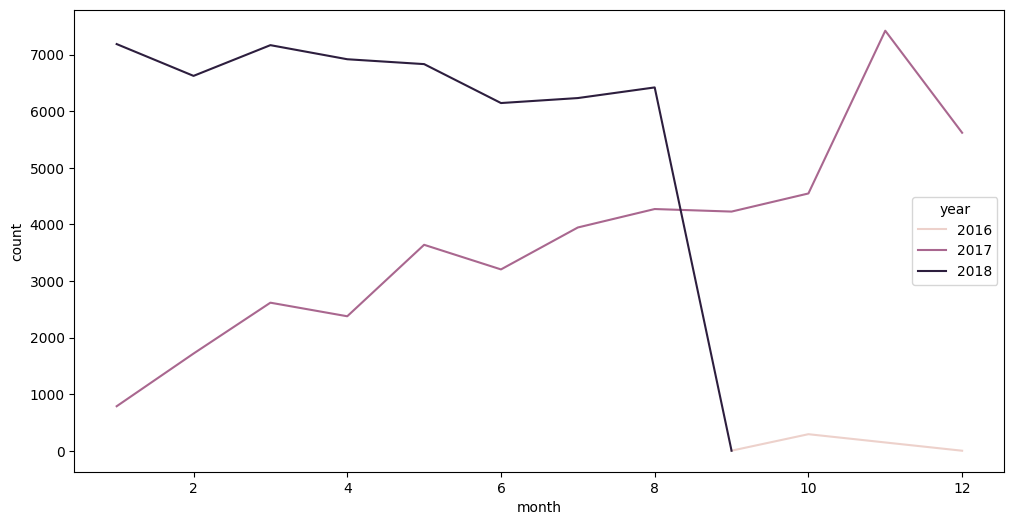

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=purchs,x='month',y='count',hue='year')
plt.show()

# 

In [29]:
purchsess = """
    SELECT
        o.order_purchase_timestamp, -- Memilih kolom order_purchase_timestamp
        o.order_id, -- Memilih kolom order_id
        product_category_name -- Memilih kolom product_category_name
    FROM olist_order_dataset AS o -- Menggunakan tabel 'olist_order_dataset' dengan alias 'o'
    INNER JOIN olist_order_items_dataset AS oi -- Melakukan INNER JOIN dengan tabel 'olist_order_items_dataset' dengan alias 'oi'
        ON o.order_id = oi.order_id -- Menghubungkan berdasarkan kolom 'order_id'
    INNER JOIN olist_products_dataset AS op -- Melakukan INNER JOIN dengan tabel 'olist_products_dataset' dengan alias 'op'
        ON oi.product_id = op.product_id -- Menghubungkan berdasarkan kolom 'product_id'
    WHERE o.order_status NOT IN ('unavailable', 'canceled') -- Menggunakan kondisi WHERE untuk menyaring order dengan status tertentu
        AND strftime('%Y-%m', order_purchase_timestamp) >= '2017-10' -- Mengambil data yang memiliki tanggal order_purchase_timestamp setelah atau pada bulan Oktober 2017
        AND strftime('%Y-%m', order_purchase_timestamp) < '2017-11' -- Mengambil data yang memiliki tanggal order_purchase_timestamp sebelum bulan November 2017
"""
purss = get_result(purchsess)

In [30]:
purchs = pd.DataFrame(purss, columns=['datepurchase', 'order_id', 'category_name']).drop_duplicates().sort_values(by='datepurchase', ascending=True)
purchs

,datepurchase,order_id,category_name
2608,2017-10-01 00:03:33,80c86e92eef37052119cf0e9a402000a,brinquedos
1560,2017-10-01 00:06:09,f9a6e72c6b5a49a9aaa0a85b32adc581,beleza_saude
660,2017-10-01 00:15:12,aefefdda7b7a272ca35c44b82b643104,fashion_bolsas_e_acessorios
4026,2017-10-01 00:19:04,38c08fbad68f49682733a8d83e997aa6,relogios_presentes
4806,2017-10-01 01:10:18,cd9cbb9b4a02d47f00a71acb290605a6,cama_mesa_banho
...,...,...,...
3414,2017-10-31 22:40:47,2e59385ec33f6734c6e53346083771aa,ferramentas_jardim
1829,2017-10-31 23:00:50,af4e1751fceaef178caea3c840671a83,ferramentas_jardim
3408,2017-10-31 23:01:54,b06bc7a576465f0015213ab5ab899ef8,perfumaria
1169,2017-10-31 23:50:23,675a6fde0b4a8f78243d9ca2ec8be1be,automotivo


### terdapat duplicated yang disebabkan adanya 2 category name dalam 1 order_id

In [31]:
purchs['order_id'].value_counts()

order_id
d839ea07a528e914f89702508023da37    3
4ca4a1922b582950b25cce6e7ef34315    3
67c2939389900ee5ef95296df8691336    2
5337d26d14027f547caacb7fee230f81    2
2002527d89799a0cfb0adf6f4710bf95    2
                                   ..
4c4ac3e2dfb16b17d057cf101265b24c    1
c31f5afc2aa6a048ea1d0f84afd0b762    1
7921190dc054e6839a4cfc253a578377    1
91501d5292dbe67f25d3c8867cd67f44    1
70cd45f4715c8840b197efee2b9d533c    1
Name: count, Length: 4547, dtype: int64

In [32]:
purchs[['order_id','category_name']].value_counts()

order_id                          category_name     
00143d0f86d6fbd9f9b38ab440ac16f5  esporte_lazer         1
ab98ab3726335315eb814d5ba24caba8  moveis_decoracao      1
ac1ba3d6cc5dbfbe4ebb5db9d2039bcc  esporte_lazer         1
ac046375de5d50de6bb99a9bcdf592d8  relogios_presentes    1
abfc66aeb626c9309463b929eacfa7b4  perfumaria            1
                                                       ..
55f2d8cb4b644ca9cc2da77732fd1117  cool_stuff            1
55ff9b1565b988a5125bc8f70a9df367  perfumaria            1
56030114e560e8093abc06e38626e871  eletrodomesticos_2    1
561d2ce55a3b6c040a6ba77fa5428056  perfumaria            1
fffce4705a9662cd70adb13d4a31832d  esporte_lazer         1
Name: count, Length: 4522, dtype: int64

In [33]:
purchs['category_name'].value_counts().head(10)

category_name
cama_mesa_banho           445
esporte_lazer             423
beleza_saude              331
relogios_presentes        286
brinquedos                277
moveis_decoracao          269
informatica_acessorios    261
cool_stuff                245
telefonia                 228
ferramentas_jardim        214
Name: count, dtype: int64

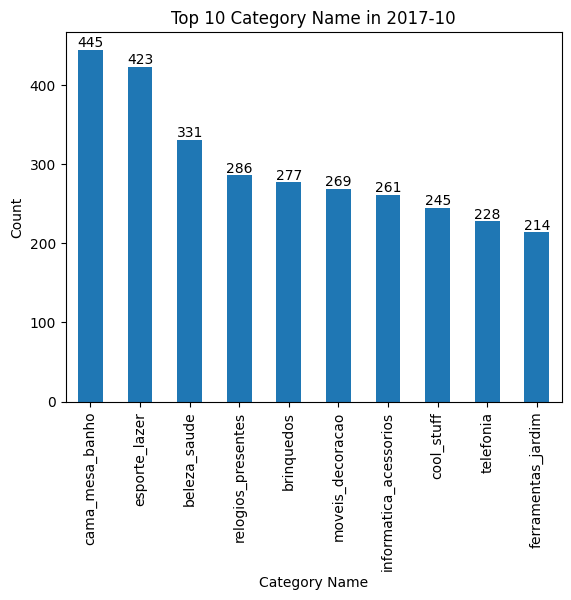

In [34]:
purchas = purchs['category_name'].value_counts().head(10)
# membuat barchart
ax = purchas.plot.bar()

# menambahkan label sumbu x dan y
plt.xlabel('Category Name')
plt.ylabel('Count')

# menambahkan judul
plt.title('Top 10 Category Name in 2017-10')


# menambahkan label di atas barchart
for p in ax.patches:
    # mendapatkan nilai x dan y dari setiap bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    # menampilkan nilai y di atas bar dengan jarak 0.1
    ax.annotate(str(y), (x, y + 0.1), ha='center', va='bottom')

# menampilkan barchart
plt.show()

In [35]:
#pip install translate
#from translate import Translator


In [36]:

''''

SyntaxError: EOL while scanning string literal (<ipython-input-36-e645c34ecf8c>, line 11)

## Payment

In [ ]:
payment = """
        SELECT
            p.payment_type, -- Memilih kolom payment_type
            COUNT(o.order_id) AS count_orders, -- Menghitung jumlah pesanan (order_id) sebagai 'count_orders'
            CAST(SUM(p.payment_value) / 1000 AS INTEGER) AS sum_of_value_divided_K -- Menghitung total pembayaran dibagi 1000 sebagai 'sum_of_value_divided_K'
        FROM olist_order_payments_dataset AS p -- Menggunakan tabel 'olist_order_payments_dataset' dengan alias 'p'
        LEFT JOIN olist_order_dataset AS o -- Melakukan LEFT JOIN dengan tabel 'olist_order_dataset' dengan alias 'o'
            ON p.order_id = o.order_id -- Menghubungkan berdasarkan kolom 'order_id'
        WHERE o.order_status <> 'canceled' -- Menggunakan kondisi WHERE untuk menyaring order dengan status tidak sama dengan 'canceled'
            AND o.order_delivered_customer_date IS NOT NULL -- Mengambil data yang memiliki tanggal pengiriman pelanggan yang tidak kosong
        GROUP BY p.payment_type -- Mengelompokkan hasil berdasarkan metode pembayaran (payment_type)
        """

pay = get_result(payment)

In [ ]:
payment = pd.DataFrame(pay, columns=['payment_type', 'count_orders', 'sum_of_value_devided_K']).drop_duplicates().sort_values(by='count_orders', ascending=True)
payment

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(data=payment, x='payment_type', y = 'count_orders', ax = axes[0])
axes[0].bar_label(axes[0].containers[0])
sns.barplot(data=payment, x='payment_type', y = 'sum_of_value_devided_K', ax = axes[1])
axes[1].bar_label(axes[1].containers[0])

plt.show()